<a href="https://colab.research.google.com/github/MartinNde/MartinN_1/blob/main/Time_Series_Competition_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import the packages#

These libraries are needed for the manipulating data and also visualising data. These are tools for handling data.

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
import statsmodels.api as sm
import itertools
from sklearn.metrics import mean_squared_error,mean_absolute_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from scipy.spatial.distance import cdist
import seaborn as sns
import scipy.stats
import pylab
import warnings
warnings.filterwarnings('ignore')
sns.set()


#Importing the Data#
The data is manipulated in the python but comes from other souces and in different formats. The data is imported from google drive in this case.

In [199]:
raw_csv_data = pd.read_csv('/content/PT_Train.csv')

In [200]:
df = raw_csv_data.copy()

##View the data to have an understanding of the structure##
Viewing the data enhances understanding of the data points and to be able to see if there is anything that stands out in the data. However, this is just the top five rows meaning that the bottom or other methods should be used to have a good understanding of the data.


In [201]:
df.head()

,Timestamp (GMT),Lifetouch Heart Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse
0,17/08/2015 15:09,139,41,NaN,NaN
1,17/08/2015 15:10,144,40,92.0,140.0
2,17/08/2015 15:11,140,42,89.0,144.0
3,17/08/2015 15:12,138,45,93.0,141.0
4,17/08/2015 15:13,133,42,94.0,134.0


A larger amount of the data is viewed again to quickly see if there is something to pick up before further exploration of the datat.

In [202]:
df

,Timestamp (GMT),Lifetouch Heart Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse
0,17/08/2015 15:09,139,41,NaN,NaN
1,17/08/2015 15:10,144,40,92.0,140.0
2,17/08/2015 15:11,140,42,89.0,144.0
3,17/08/2015 15:12,138,45,93.0,141.0
4,17/08/2015 15:13,133,42,94.0,134.0
...,...,...,...,...,...
221,17/08/2015 18:50,159,51,NaN,NaN
222,17/08/2015 18:51,151,64,NaN,NaN
223,17/08/2015 18:52,140,64,NaN,NaN
224,17/08/2015 18:53,140,55,NaN,NaN


In [203]:
print(df.shape)
df.head()

(226, 5)


,Timestamp (GMT),Lifetouch Heart Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse
0,17/08/2015 15:09,139,41,NaN,NaN
1,17/08/2015 15:10,144,40,92.0,140.0
2,17/08/2015 15:11,140,42,89.0,144.0
3,17/08/2015 15:12,138,45,93.0,141.0
4,17/08/2015 15:13,133,42,94.0,134.0


In [204]:
df.describe()

,Lifetouch Heart Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse
count,226.000000,226.000000,191.000000,191.000000
mean,2315.615044,2219.216814,83.450262,126.335079
std,11351.588825,11370.093548,29.802974,46.348142
min,106.000000,34.000000,-1.000000,-1.000000
25%,136.000000,38.000000,92.000000,134.000000
50%,145.000000,46.000000,93.000000,139.000000
75%,156.000000,53.000000,95.000000,149.000000
max,61442.000000,61442.000000,98.000000,166.000000


In [205]:
df.isna().sum()

Timestamp (GMT)                0
Lifetouch Heart Rate           0
Lifetouch Respiration Rate     0
Oximeter SpO2                 35
Oximeter Pulse                35
dtype: int64

Simpliyfing the Dataset by taking out the columns that are not needed for the prediction.

In [206]:
df = df.drop(['Lifetouch Respiration Rate','Oximeter SpO2','Oximeter Pulse'], axis=1)



In [207]:
df.describe()

,Lifetouch Heart Rate
count,226.000000
mean,2315.615044
std,11351.588825
min,106.000000
25%,136.000000
50%,145.000000
75%,156.000000
max,61442.000000


In [208]:
df.isna().sum()

Timestamp (GMT)         0
Lifetouch Heart Rate    0
dtype: int64

Setting the index

In [209]:
df['Timestamp (GMT)']=pd.to_datetime(df['Timestamp (GMT)'])

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Timestamp (GMT)       226 non-null    datetime64[ns]
 1   Lifetouch Heart Rate  226 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.7 KB


In [211]:
df.set_index("Timestamp (GMT)", inplace = True)

In [212]:
df

,Lifetouch Heart Rate
Timestamp (GMT),
2015-08-17 15:09:00,139
2015-08-17 15:10:00,144
2015-08-17 15:11:00,140
2015-08-17 15:12:00,138
2015-08-17 15:13:00,133
...,...
2015-08-17 18:50:00,159
2015-08-17 18:51:00,151
2015-08-17 18:52:00,140


In [213]:
df.sort_values(by=['Lifetouch Heart Rate']).tail(20)

,Lifetouch Heart Rate
Timestamp (GMT),
2015-08-17 17:54:00,163
2015-08-17 17:55:00,164
2015-08-17 17:40:00,164
2015-08-17 18:07:00,164
2015-08-17 18:01:00,165
2015-08-17 17:56:00,166
2015-08-17 17:39:00,166
2015-08-17 17:42:00,167
2015-08-17 17:58:00,169


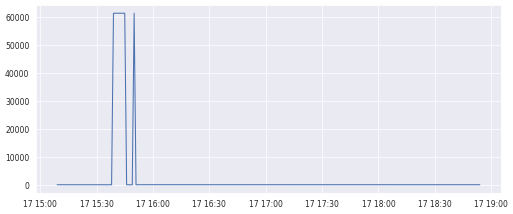

In [214]:
plt.figure(figsize =(12,5),dpi=50)
plt.plot(df)
plt.show()

Dealing with outliers
These are first of all removed and then front filled such that there is no differences in the data.

In [215]:
df = df.replace({'Lifetouch Heart Rate':{61441:np.nan,61442:np.nan}})

In [216]:
df.sort_values(by=['Lifetouch Heart Rate']).tail(20)

,Lifetouch Heart Rate
Timestamp (GMT),
2015-08-17 17:33:00,163.0
2015-08-17 17:55:00,164.0
2015-08-17 17:40:00,164.0
2015-08-17 18:07:00,164.0
2015-08-17 18:01:00,165.0
2015-08-17 17:56:00,166.0
2015-08-17 17:39:00,166.0
2015-08-17 17:42:00,167.0
2015-08-17 17:57:00,169.0


In [217]:
df = df.ffill()

In [218]:
df.sort_values(by=['Lifetouch Heart Rate']).tail(20)

,Lifetouch Heart Rate
Timestamp (GMT),
2015-08-17 18:05:00,161.0
2015-08-17 17:32:00,162.0
2015-08-17 17:31:00,162.0
2015-08-17 17:30:00,163.0
2015-08-17 17:34:00,163.0
2015-08-17 17:54:00,163.0
2015-08-17 17:52:00,163.0
2015-08-17 18:02:00,163.0
2015-08-17 17:33:00,163.0


Splitting Data - An 80/20 split is reasonable

In [219]:
df_train = df.iloc[0:80]

In [220]:
df_train.shape

(80, 1)

In [221]:
df_test = df.iloc[-20:,:]

In [222]:
df_test

,Lifetouch Heart Rate
Timestamp (GMT),
2015-08-17 18:35:00,159.0
2015-08-17 18:36:00,160.0
2015-08-17 18:37:00,155.0
2015-08-17 18:38:00,155.0
2015-08-17 18:39:00,148.0
2015-08-17 18:40:00,148.0
2015-08-17 18:41:00,152.0
2015-08-17 18:42:00,152.0
2015-08-17 18:43:00,150.0


**Viewing the data before differencing**

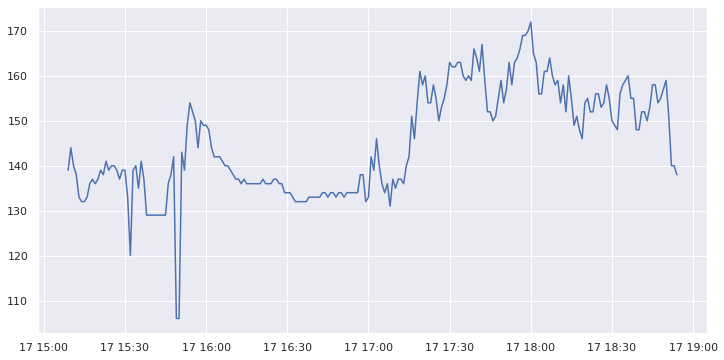

In [223]:
# plot time series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Lifetouch Heart Rate'])
plt.show()


**Differencing**

In [224]:
df['Lifetouch Heart Rate_diff'] = df[['Lifetouch Heart Rate']].diff(axis = 0,periods = 1)
df.head()

,Lifetouch Heart Rate,Lifetouch Heart Rate_diff
Timestamp (GMT),,
2015-08-17 15:09:00,139.0,NaN
2015-08-17 15:10:00,144.0,5.0
2015-08-17 15:11:00,140.0,-4.0
2015-08-17 15:12:00,138.0,-2.0
2015-08-17 15:13:00,133.0,-5.0


**Viiewing the data after differencing**

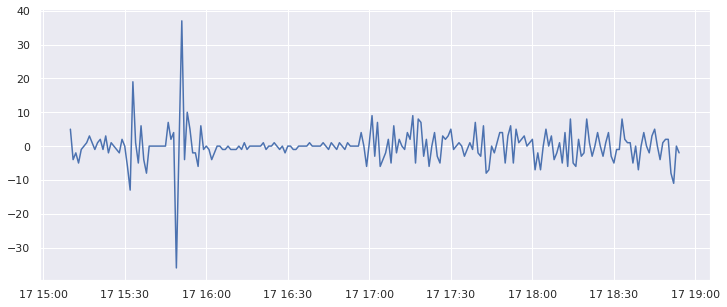

In [225]:
plt.figure(figsize =(12,5))
plt.plot(df.index,df['Lifetouch Heart Rate_diff'])
plt.show()

##Plot the time series##

In [226]:
df = df.bfill()

Check stationarity of the series

In [227]:
df.head()

,Lifetouch Heart Rate,Lifetouch Heart Rate_diff
Timestamp (GMT),,
2015-08-17 15:09:00,139.0,5.0
2015-08-17 15:10:00,144.0,5.0
2015-08-17 15:11:00,140.0,-4.0
2015-08-17 15:12:00,138.0,-2.0
2015-08-17 15:13:00,133.0,-5.0


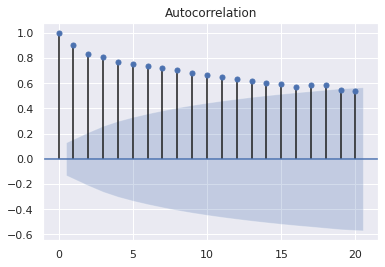

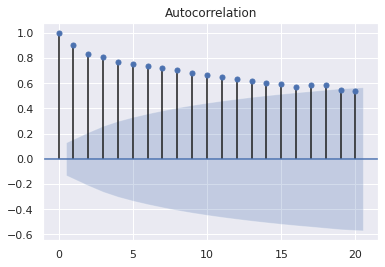

In [228]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Lifetouch Heart Rate'], lags=20)


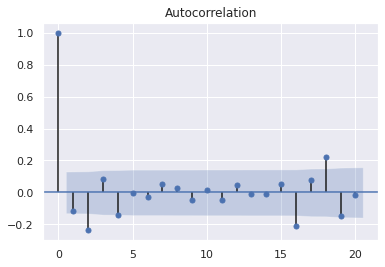

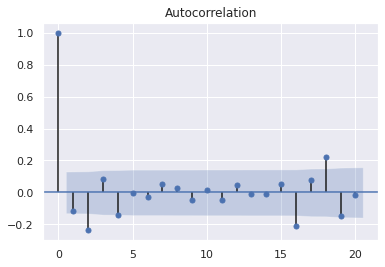

In [229]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Lifetouch Heart Rate_diff'], lags=20)

In [230]:

# ADF test on random numbers
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print('Critial Values:')
        print(f'   {key}, {value}')

series = df.loc[:, 'Lifetouch Heart Rate_diff'].values
adf_test(series)

ADF Statistic: -8.378736496602256
p-value: 2.5440013768441153e-13
Critial Values:
   1%, -3.4604283689894815
Critial Values:
   5%, -2.874768966942149
Critial Values:
   10%, -2.57382076446281


In [231]:
# df_diff = np.diff(df['Lifetouch Heart Rate'])
#we have done differencing now test for stationarity below

In [232]:
##adf_test(df_diff)

#ARIMA Model#

In [233]:
p = d = q = range(0, 3)

# generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
# generate all different combinations of seasonal p, q and q triplets
# seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
seasonal_pdq = [(1, 1, 1, 12)]

for param in pdq:
    for param_seasonal in seasonal_pdq:
          mod = sm.tsa.statespace.SARIMAX(df['Lifetouch Heart Rate'],
                                          order=param,
                                          seasonal_order=param_seasonal,
                                          enforce_stationarity=False,
                                          enforce_invertibility=False)

          mod_fit = mod.fit()

          print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, mod_fit.aic))

ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1480.9732424490617
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1341.2409592923052
ARIMA(0, 0, 2)x(1, 1, 1, 12)12 - AIC:1308.228177767666
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1249.8661831622462
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:1242.4090525963898
ARIMA(0, 1, 2)x(1, 1, 1, 12)12 - AIC:1221.926847830975
ARIMA(0, 2, 0)x(1, 1, 1, 12)12 - AIC:1400.886973768338
ARIMA(0, 2, 1)x(1, 1, 1, 12)12 - AIC:1244.7950716018295
ARIMA(0, 2, 2)x(1, 1, 1, 12)12 - AIC:1238.318816433703
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:1247.512321803346
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:1243.4062085949804
ARIMA(1, 0, 2)x(1, 1, 1, 12)12 - AIC:1227.8053719175075
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:1250.1044631880231
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1233.161124759007
ARIMA(1, 1, 2)x(1, 1, 1, 12)12 - AIC:1223.0873294783296
ARIMA(1, 2, 0)x(1, 1, 1, 12)12 - AIC:1360.0466964528564
ARIMA(1, 2, 1)x(1, 1, 1, 12)12 - AIC:1245.543092367131
ARIMA(1, 2, 2)x(1, 1, 1, 12)12 - AIC:1239.3404767210334

In [234]:
# # specify model
# model = sm.tsa.statespace.SARIMAX(df['Lifetouch Heart Rate'],
#                                 order=(0, 1, 2),
#                                 seasonal_order=(1, 1, 1, 12),
#                                 enforce_stationarity=False,
#                                 enforce_invertibility=False)
# # train model
# model_fit = model.fit()

# # make predictions
# preds = model_fit.predict(start=pd.to_datetime('2015-08-17 15:09:00'), dynamic=False)

# # calculate MSE
# actuals = df['Lifetouch Heart Rate']
# print(f'Mean Squared Error: {round(mean_squared_error(actuals, preds), 2)}')

In [235]:
train=df.iloc[:-20]
test=df.iloc[-20:]
model=sm.tsa.statespace.SARIMAX(df['Lifetouch Heart Rate'],order=(0,1,2),seasonal_order=(1,1,1,12),enforce_invertibility=False).fit()

start=len(train)
end=len(train)+len(test)-1

predictions=model.predict(start=start,end=end,params=model.params)

mse=mean_squared_error(test['Lifetouch Heart Rate'],predictions)
print("Root Mean Squared Error:",np.sqrt(mse))

mae=mean_absolute_error(test['Lifetouch Heart Rate'],predictions)
print('Mean Absolute Error',mae)

Root Mean Squared Error: 4.534066038329563
Mean Absolute Error 3.4040627782122512


In [236]:
forecasts=model.forecast(steps=20)
print(forecasts)

2015-08-17 18:55:00    139.980190
2015-08-17 18:56:00    141.778557
2015-08-17 18:57:00    144.247966
2015-08-17 18:58:00    144.341668
2015-08-17 18:59:00    143.253916
2015-08-17 19:00:00    144.759386
2015-08-17 19:01:00    142.581036
2015-08-17 19:02:00    142.011224
2015-08-17 19:03:00    142.260741
2015-08-17 19:04:00    141.499265
2015-08-17 19:05:00    141.774207
2015-08-17 19:06:00    142.397329
2015-08-17 19:07:00    142.081536
2015-08-17 19:08:00    141.483076
2015-08-17 19:09:00    143.938403
2015-08-17 19:10:00    144.032626
2015-08-17 19:11:00    142.961081
2015-08-17 19:12:00    144.469364
2015-08-17 19:13:00    142.267761
2015-08-17 19:14:00    141.683648
Freq: T, Name: predicted_mean, dtype: float64


Text(0.5, 1.0, 'Forcasts\xa0and\xa0Initial\xa0Values\xa0Plot')

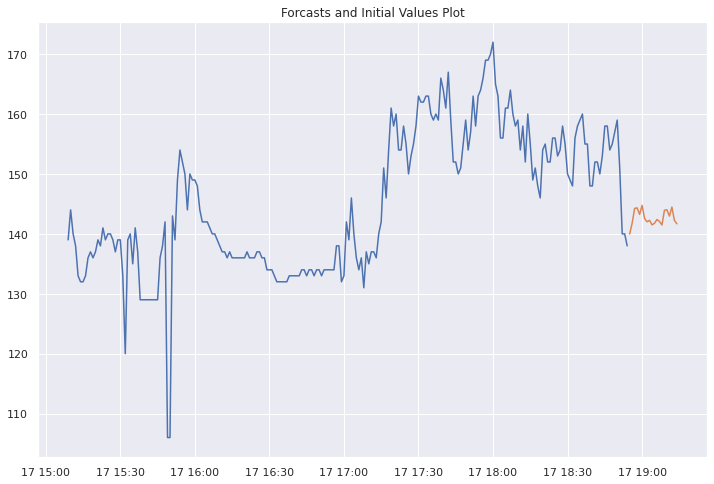

In [237]:
plt.figure(figsize=(12,8))
plt.plot(df['Lifetouch Heart Rate'],label='Forecasts')
plt.plot(forecasts)
plt.title("Forcasts and Initial Values Plot")

**SARIMA** **MODEL**

In [238]:
df['Lifetouch Heart Rate']

Timestamp (GMT)
2015-08-17 15:09:00    139.0
2015-08-17 15:10:00    144.0
2015-08-17 15:11:00    140.0
2015-08-17 15:12:00    138.0
2015-08-17 15:13:00    133.0
                       ...  
2015-08-17 18:50:00    159.0
2015-08-17 18:51:00    151.0
2015-08-17 18:52:00    140.0
2015-08-17 18:53:00    140.0
2015-08-17 18:54:00    138.0
Name: Lifetouch Heart Rate, Length: 226, dtype: float64

In [239]:

# order - The (p,d,q) order of the model for the number of AR parameters, differences, and MA parameters.
# seasonal_order - The (P,D,Q,s) order of the seasonal component of the model for the AR parameters, differences, MA parameters, and periodicity.
model = sm.tsa.statespace.SARIMAX(df['Lifetouch Heart Rate'],
                                  order=(0, 1, 2),
                                 
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)
# train model
model_fit = model.fit()
print(model_fit.summary())

                                SARIMAX Results                                 
Dep. Variable:     Lifetouch Heart Rate   No. Observations:                  226
Model:                 SARIMAX(0, 1, 2)   Log Likelihood                -664.777
Date:                  Mon, 20 Feb 2023   AIC                           1335.555
Time:                          02:16:31   BIC                           1345.763
Sample:                      08-17-2015   HQIC                          1339.676
                           - 08-17-2015                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1373      0.057     -2.427      0.015      -0.248      -0.026
ma.L2         -0.3789      0.030    -12.782      0.000      -0.437      -0.321
sigma2        23.3397      1.045    

In [240]:
  df.tail()

,Lifetouch Heart Rate,Lifetouch Heart Rate_diff
Timestamp (GMT),,
2015-08-17 18:50:00,159.0,2.0
2015-08-17 18:51:00,151.0,-8.0
2015-08-17 18:52:00,140.0,-11.0
2015-08-17 18:53:00,140.0,0.0
2015-08-17 18:54:00,138.0,-2.0


In [241]:
# make predictions
preds = model_fit.predict(start=pd.to_datetime('2015-08-17 18:20:00'), dynamic=False)
print(preds)

2015-08-17 18:20:00    148.169118
2015-08-17 18:21:00    154.356520
2015-08-17 18:22:00    152.702449
2015-08-17 18:23:00    151.852648
2015-08-17 18:24:00    152.245911
2015-08-17 18:25:00    155.428721
2015-08-17 18:26:00    154.499216
2015-08-17 18:27:00    152.989402
2015-08-17 18:28:00    154.429263
2015-08-17 18:29:00    157.126830
2015-08-17 18:30:00    153.939144
2015-08-17 18:31:00    151.346670
2015-08-17 18:32:00    150.814665
2015-08-17 18:33:00    149.275568
2015-08-17 18:34:00    156.143129
2015-08-17 18:35:00    155.197299
2015-08-17 18:36:00    157.774346
2015-08-17 18:37:00    158.253646
2015-08-17 18:38:00    154.603484
2015-08-17 18:39:00    156.178295
2015-08-17 18:40:00    148.972678
2015-08-17 18:41:00    151.232137
2015-08-17 18:42:00    152.263097
2015-08-17 18:43:00    151.745197
2015-08-17 18:44:00    150.339304
2015-08-17 18:45:00    153.295895
2015-08-17 18:46:00    156.346027
2015-08-17 18:47:00    155.990617
2015-08-17 18:48:00    153.646663
2015-08-17 18:

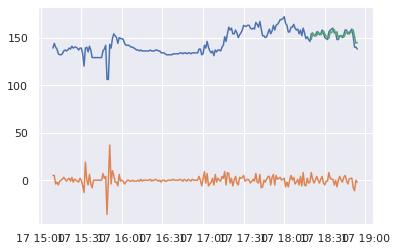

In [242]:
plt.plot(df)
plt.plot(preds)

In [243]:
# Out-of-sample forecasts
forecasts = model_fit.forecast(steps=20)
print(forecasts)

2015-08-17 18:55:00    140.509577
2015-08-17 18:56:00    143.056523
2015-08-17 18:57:00    143.056523
2015-08-17 18:58:00    143.056523
2015-08-17 18:59:00    143.056523
2015-08-17 19:00:00    143.056523
2015-08-17 19:01:00    143.056523
2015-08-17 19:02:00    143.056523
2015-08-17 19:03:00    143.056523
2015-08-17 19:04:00    143.056523
2015-08-17 19:05:00    143.056523
2015-08-17 19:06:00    143.056523
2015-08-17 19:07:00    143.056523
2015-08-17 19:08:00    143.056523
2015-08-17 19:09:00    143.056523
2015-08-17 19:10:00    143.056523
2015-08-17 19:11:00    143.056523
2015-08-17 19:12:00    143.056523
2015-08-17 19:13:00    143.056523
2015-08-17 19:14:00    143.056523
Freq: T, Name: predicted_mean, dtype: float64


In [244]:
#actuals 
actuals = df['Lifetouch Heart Rate'][-35:]



mse=mean_squared_error (actuals,preds)
print("Root Mean Squared Error:",np.sqrt(mse))

mae=mean_absolute_error(actuals,preds)
print('Mean Absolute Error',mae)


Root Mean Squared Error: 3.8879911490432093
Mean Absolute Error 2.9882813498108827


In [245]:
import json

predictions = forecasts

data = []
for pred in predictions:
    data.append({'prediction': pred})

print(data[0:5])

submission_file_path = "submission.json"
with open(submission_file_path, 'w') as fp:
    fp.write('\n'.join(json.dumps(i) for i in data))


[{'prediction': 140.5095772617904}, {'prediction': 143.0565228476444}, {'prediction': 143.0565228476444}, {'prediction': 143.0565228476444}, {'prediction': 143.0565228476444}]


#Exponential smoothing

In [246]:
df=df.drop('Lifetouch Heart Rate_diff',axis=1)

In [247]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [248]:
# Split the data into training and test sets
train_data = df[:-20]
test_data = df[-20:]

# Fit a simple exponential smoothing model to the training data
model = SimpleExpSmoothing(train_data['Lifetouch Heart Rate']).fit(smoothing_level=0.2)



In [249]:
test_data

,Lifetouch Heart Rate
Timestamp (GMT),
2015-08-17 18:35:00,159.0
2015-08-17 18:36:00,160.0
2015-08-17 18:37:00,155.0
2015-08-17 18:38:00,155.0
2015-08-17 18:39:00,148.0
2015-08-17 18:40:00,148.0
2015-08-17 18:41:00,152.0
2015-08-17 18:42:00,152.0
2015-08-17 18:43:00,150.0


In [250]:
# Use the fitted model to make predictions for the test data
# predictions = model.predict(100)
# predictions = model.predict(start=len(test_data), end=len(test_data))
predictions = model.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

# Calculate the MAE and RMSE of the predictions
mae = mean_absolute_error(test_data, predictions)
rmse = mean_squared_error(test_data, predictions, squared=False)

print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")

MAE: 4.90, RMSE: 6.58


In [251]:
predictions

2015-08-17 18:35:00    153.728246
2015-08-17 18:36:00    153.728246
2015-08-17 18:37:00    153.728246
2015-08-17 18:38:00    153.728246
2015-08-17 18:39:00    153.728246
2015-08-17 18:40:00    153.728246
2015-08-17 18:41:00    153.728246
2015-08-17 18:42:00    153.728246
2015-08-17 18:43:00    153.728246
2015-08-17 18:44:00    153.728246
2015-08-17 18:45:00    153.728246
2015-08-17 18:46:00    153.728246
2015-08-17 18:47:00    153.728246
2015-08-17 18:48:00    153.728246
2015-08-17 18:49:00    153.728246
2015-08-17 18:50:00    153.728246
2015-08-17 18:51:00    153.728246
2015-08-17 18:52:00    153.728246
2015-08-17 18:53:00    153.728246
2015-08-17 18:54:00    153.728246
Freq: T, dtype: float64

In [252]:
# single exponential smoothing
single_fit = SimpleExpSmoothing(train_data).fit()
single_predictions = single_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

In [253]:
# double exponential smoothing
double_fit = Holt(df["Lifetouch Heart Rate"]).fit()
double_predictions = double_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)


In [254]:
# triple exponential smoothing
tripple_fit = ExponentialSmoothing(df["Lifetouch Heart Rate"], trend="mul",seasonal="mul", seasonal_periods=12).fit()
triple_predictions = tripple_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

In [255]:
print(single_predictions)

2015-08-17 18:35:00    156.835231
2015-08-17 18:36:00    156.835231
2015-08-17 18:37:00    156.835231
2015-08-17 18:38:00    156.835231
2015-08-17 18:39:00    156.835231
2015-08-17 18:40:00    156.835231
2015-08-17 18:41:00    156.835231
2015-08-17 18:42:00    156.835231
2015-08-17 18:43:00    156.835231
2015-08-17 18:44:00    156.835231
2015-08-17 18:45:00    156.835231
2015-08-17 18:46:00    156.835231
2015-08-17 18:47:00    156.835231
2015-08-17 18:48:00    156.835231
2015-08-17 18:49:00    156.835231
2015-08-17 18:50:00    156.835231
2015-08-17 18:51:00    156.835231
2015-08-17 18:52:00    156.835231
2015-08-17 18:53:00    156.835231
2015-08-17 18:54:00    156.835231
Freq: T, dtype: float64


In [256]:
print(double_predictions)

2015-08-17 18:35:00    157.135677
2015-08-17 18:36:00    158.568208
2015-08-17 18:37:00    159.667067
2015-08-17 18:38:00    156.061022
2015-08-17 18:39:00    155.236824
2015-08-17 18:40:00    149.648363
2015-08-17 18:41:00    148.371064
2015-08-17 18:42:00    151.164885
2015-08-17 18:43:00    151.803441
2015-08-17 18:44:00    150.406509
2015-08-17 18:45:00    152.401547
2015-08-17 18:46:00    156.714734
2015-08-17 18:47:00    157.700557
2015-08-17 18:48:00    154.840116
2015-08-17 18:49:00    154.957773
2015-08-17 18:50:00    156.527545
2015-08-17 18:51:00    158.429213
2015-08-17 18:52:00    152.692337
2015-08-17 18:53:00    142.895274
2015-08-17 18:54:00    140.656055
Freq: T, dtype: float64


In [257]:
print(triple_predictions)

2015-08-17 18:35:00    156.332440
2015-08-17 18:36:00    159.939883
2015-08-17 18:37:00    157.086533
2015-08-17 18:38:00    154.582873
2015-08-17 18:39:00    155.802120
2015-08-17 18:40:00    149.214889
2015-08-17 18:41:00    148.580254
2015-08-17 18:42:00    152.329123
2015-08-17 18:43:00    151.507382
2015-08-17 18:44:00    149.083407
2015-08-17 18:45:00    154.400799
2015-08-17 18:46:00    157.603258
2015-08-17 18:47:00    156.827349
2015-08-17 18:48:00    156.017368
2015-08-17 18:49:00    152.391645
2015-08-17 18:50:00    155.222370
2015-08-17 18:51:00    159.139955
2015-08-17 18:52:00    152.275849
2015-08-17 18:53:00    142.809295
2015-08-17 18:54:00    141.519176
Freq: T, dtype: float64


In [258]:
# Calculate the MAE and RMSE of the predictions
mae = mean_absolute_error(test_data, single_predictions)
rmse = mean_squared_error(test_data, single_predictions, squared=False)

print(f"Single_fit Predictions MAE: {mae:.2f}, RMSE: {rmse:.2f}")

Single_fit Predictions MAE: 5.73, RMSE: 7.94


In [259]:
# Calculate the MAE and RMSE of the predictions
mae = mean_absolute_error(test_data, double_predictions)
rmse = mean_squared_error(test_data, double_predictions, squared=False)

print(f"Double_fit Predictions MAE: {mae:.2f}, RMSE: {rmse:.2f}")

Double_fit Predictions MAE: 3.39, RMSE: 4.45


In [260]:
# Calculate the MAE and RMSE of the predictions
mae = mean_absolute_error(test_data, triple_predictions)
rmse = mean_squared_error(test_data, triple_predictions, squared=False)

print(f"Triple_fit Predictions MAE: {mae:.2f}, RMSE: {rmse:.2f}")

Triple_fit Predictions MAE: 3.32, RMSE: 4.46
